In [1]:
import numpy as np 
import pandas as pd 
from scipy import spatial

import warnings
warnings.filterwarnings('ignore')

import re
import os

In [2]:
ratings = pd.read_csv("C:\\Users\\Maruthi\\Desktop\\kaggle\\movielens\\ratings.csv")
tags = pd.read_csv("C:\\Users\\Maruthi\\Desktop\\kaggle\\movielens\\tags.csv")
movies = pd.read_csv("C:\\Users\\Maruthi\\Desktop\\kaggle\\movielens\\movies.csv")

In [3]:
print(ratings.shape)
ratings.head(5)

(1048575, 4)


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
pd.options.display.float_format = '{:f}'.format
ratings['rating'].describe()

count   1048575.000000
mean          3.529272
std           1.051919
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [5]:
ratings['rating'].hist()

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

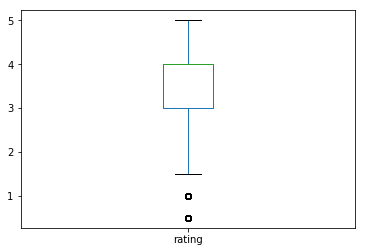

In [6]:
ratings['rating'].plot(kind='box', subplots=True)

In [7]:
userRatingsAggr = ratings.groupby(['userId']).agg({'rating': [np.size, np.mean]})
userRatingsAggr.reset_index(inplace=True)  # To reset multilevel (pivot-like) index
# userRatingsAggr.head()

size       AxesSubplot(0.125,0.125;0.352273x0.755)
mean    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

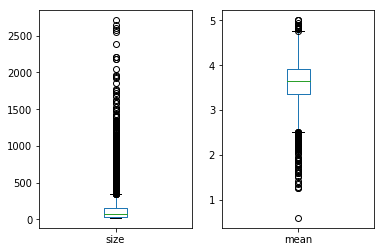

In [8]:
userRatingsAggr['rating'].plot(kind='box', subplots=True)

In [9]:
movieRatingsAggr = ratings.groupby(['movieId']).agg({'rating': [np.size, np.mean]})
movieRatingsAggr.reset_index(inplace=True)
# movieRatingsAggr.head()

In [10]:
movieRatingsAggr['rating'].describe()

,size,mean
count,14026.000000,14026.000000
mean,74.759375,3.214934
std,218.188441,0.790743
min,1.000000,0.500000
25%,2.000000,2.833333
50%,9.000000,3.363636
75%,43.000000,3.750000
max,3498.000000,5.000000


size       AxesSubplot(0.125,0.125;0.352273x0.755)
mean    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

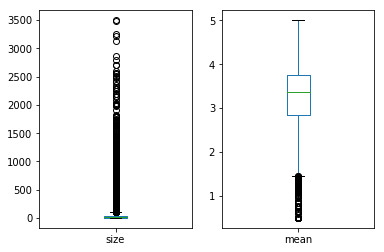

In [11]:
movieRatingsAggr['rating'].plot(kind='box', subplots=True)

In [12]:
print(tags.shape)
tags.head(5)

(465564, 4)


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [13]:
print(movies.shape)
movies.head(5)

(27278, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
movies = movies.merge(movieRatingsAggr, left_on='movieId', right_on='movieId', how='left')  # ['rating']
movies.columns = ['movieId', 'title', 'genres', 'rating_count', 'rating_avg']

In [15]:
movies.head(5)

,movieId,title,genres,rating_count,rating_avg
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2569.000000,3.959323
1,2,Jumanji (1995),Adventure|Children|Fantasy,1155.000000,3.268398
2,3,Grumpier Old Men (1995),Comedy|Romance,685.000000,3.186861
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,138.000000,3.000000
4,5,Father of the Bride Part II (1995),Comedy,657.000000,3.143836


In [16]:
def getYear(title):
    result = re.search(r'\(\d{4}\)', title)
    if result:
        found = result.group(0).strip('(').strip(')')
    else: 
        found = 0
    return int(found)
    
movies['year'] = movies.apply(lambda x: getYear(x['title']), axis=1)
# movies.head(10)

In [17]:
genresList = [
  "Action",
  "Adventure",
  "Animation",
  "Children",
  "Comedy",
  "Crime",
  "Documentary",
  "Drama",
  "Fantasy",
  "Film-Noir",
  "Horror",
  "Musical",
  "Mystery",
  "Romance",
  "Sci-Fi",
  "Thriller",
  "War",
  "Western",
  "(no genres listed)"
]

def setGenresMatrix(genres):
    movieGenresMatrix = []
    movieGenresList = genres.split('|')
    for x in genresList:
        if (x in movieGenresList):
            movieGenresMatrix.append(1)
        else:
            movieGenresMatrix.append(0) 
    return movieGenresMatrix
    
movies['genresMatrix'] = movies.apply(lambda x: np.array(list(setGenresMatrix(x['genres']))), axis=1)

movies.head(5)

,movieId,title,genres,rating_count,rating_avg,year,genresMatrix
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2569.000000,3.959323,1995,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,1155.000000,3.268398,1995,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),Comedy|Romance,685.000000,3.186861,1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,138.000000,3.000000,1995,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
4,5,Father of the Bride Part II (1995),Comedy,657.000000,3.143836,1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [18]:
movieRatingsAggr['rating'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])

,size,mean
count,14026.000000,14026.000000
mean,74.759375,3.214934
std,218.188441,0.790743
min,1.000000,0.500000
10%,1.000000,2.166667
20%,2.000000,2.666667
30%,3.000000,3.000000
40%,5.000000,3.166667
50%,9.000000,3.363636
60%,16.000000,3.500000


In [19]:
def setRatingGroup(numberOfRatings):
    # if (numberOfRatings is None): return 0
    if (1 <= numberOfRatings <= 10): return 1
    elif (11 <= numberOfRatings <= 30): return 2
    elif (31 <= numberOfRatings <= 100): return 3
    elif (101 <= numberOfRatings <= 300): return 4
    elif (301 <= numberOfRatings <= 1000): return 5
    elif (1001 <= numberOfRatings): return 6
    else: return 0

movies['ratingGroup'] = movies.apply(lambda x: setRatingGroup(x['rating_count']), axis=1)
movies.fillna(0, inplace=True)  # Replace NaN values to zero

# movies.head(10)

In [20]:
stopWords = ['a', 'about', 'above', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 
        'alone', 'along', 'already', 'also','although','always','am','among', 'amongst', 'amoungst', 'amount',  'an', 'and', 
        'another', 'any','anyhow','anyone','anything','anyway', 'anywhere', 'are', 'around', 'as',  'at', 'back','be','became', 
        'because','become','becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 
        'between', 'beyond', 'bill', 'both', 'bottom','but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 
        'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven','else', 
        'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 
        'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 
        'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 
        'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 
        'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 
        'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 
        'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 
        'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own','part', 'per', 'perhaps', 'please', 
        'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 
        'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 
        'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 
        'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 
        'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 
        'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 
        'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 
        'yet', 'you', 'your', 'yours', 'yourself', 'yourselves', 'the']

tagsDict = {}

for index, x in tags.iterrows():
    wordlist = str(x['tag']).lower().split(' ')
    movieId = x['movieId']
    for y in wordlist:
        if y not in stopWords:
            if movieId in tagsDict:
                # if y not in tagsDict[movieId]:  # Switched off (we will get a non unique list)
                    tagsDict[movieId].append(y)
            else:
                tagsDict[movieId] = [y]

# tags.apply(lambda x: str(x['tag']).split(' '), axis=1)
# print(tagsDict[6])

In [21]:
titleWordsDict = {}

for index, x in movies.iterrows():
    wordlist = str(x['title']).lower().split(' ')
    movieId = x['movieId']
    for y in wordlist:
        if y not in stopWords:
            if movieId in titleWordsDict:
                    titleWordsDict[movieId].append(y)
            else:
                titleWordsDict[movieId] = [y]

In [22]:
# Parameter weights
genresSimilarityWeight = 0.8
tagsSimilarityWeight = 2
titleSimilarityWeight = 1
ratingAvgWeight = 0.2
ratingGroupWeight = 0.005
yearDistanceWeight = 0.1

def tagsSimilarity(basisMovieID, checkedMovieID, checkType):    
    # The higher value is the more similar (from 0 to 1) 
    if checkType == 'tag':
        dictToCheck = tagsDict
    else:
        dictToCheck = titleWordsDict
        
    counter = 0
    if basisMovieID in dictToCheck: 
        basisTags = dictToCheck[basisMovieID]
        countAllTags = len(basisTags)
        basisTagsDict = {}
        for x in basisTags:
            if x in basisTagsDict:
                basisTagsDict[x] += 1
            else:
                basisTagsDict[x] = 1   
        
        for x in basisTagsDict:
            basisTagsDict[x] = basisTagsDict[x] / countAllTags
    else: return 0
    
    if checkedMovieID in dictToCheck: 
        checkedTags = dictToCheck[checkedMovieID]
        checkedTags = set(checkedTags) # Make the list unique
        checkedTags = list(checkedTags)
        
    else: return 0
    
    for x in basisTagsDict:
        if x in checkedTags: counter += basisTagsDict[x]
    return counter
    
def checkSimilarity(movieId):
    # print("SIMILAR MOVIES TO:")
    # print (movies[movies['movieId'] == movieId][['title', 'rating_count', 'rating_avg']])
    basisGenres = np.array(list(movies[movies['movieId'] == movieId]['genresMatrix']))
    basisYear = int(movies[movies['movieId'] == movieId]['year'])
    basisRatingAvg = movies[movies['movieId'] == movieId]['rating_avg']
    basisRatingGroup = movies[movies['movieId'] == movieId]['ratingGroup']
    
    moviesWithSim = movies
    moviesWithSim['similarity'] = moviesWithSim.apply(lambda x: 
                                                      spatial.distance.cosine(x['genresMatrix'], basisGenres) * genresSimilarityWeight + 
                                                      - tagsSimilarity(movieId, x['movieId'], 'tag') * tagsSimilarityWeight +
                                                      - tagsSimilarity(movieId, x['movieId'], 'title') * titleSimilarityWeight +
                                                      abs(basisRatingAvg - x['rating_avg']) * ratingAvgWeight +
                                                      abs(basisRatingGroup - x['ratingGroup']) * ratingGroupWeight + 
                                                      abs(basisYear - x['year'])/100 * yearDistanceWeight
                                                     , axis=1)
    
    moviesWithSim = moviesWithSim.loc[(moviesWithSim.movieId != movieId)]
    return moviesWithSim[['movieId', 'title', 'genres', 'rating_count', 'rating_avg', 'similarity']].sort_values('similarity')


In [24]:
similarityResult  = checkSimilarity(1525)
similarityResult.head(10)

,movieId,title,genres,rating_count,rating_avg,similarity
664,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,536.000000,2.660448,-1.265618
1547,1599,Steel (1997),Action,28.000000,1.517857,-0.913095
1624,1681,Mortal Kombat: Annihilation (1997),Action|Adventure|Fantasy,105.000000,2.019048,-0.896154
1511,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,483.000000,2.275362,-0.849596
339,343,"Baby-Sitters Club, The (1995)",Children,49.000000,2.530612,-0.775313
1643,1702,Flubber (1997),Children|Comedy|Fantasy,196.000000,2.484694,-0.758343
3350,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,119.000000,2.676471,-0.665336
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy,542.000000,2.679889,-0.663652
1392,1426,Zeus and Roxanne (1997),Children,15.000000,2.266667,-0.662857
2078,2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy,104.000000,2.461538,-0.644318
